In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def f(x,y):
    z = (x**2)/2 + (x*y)/2 - 1
    return z

In [3]:
x0 = 0
y0 = 1
xf = 2
sol_vera = 0.71828183
init_value = 4
end_value = 64
n_steps = int(math.log2(end_value/init_value)+1)

In [4]:
def double_step(init_value, end_value, n_steps = n_steps):
    n_list = np.zeros(n_steps)
    n_list[0] = init_value
    for i in range(1,n_steps):
        n_list[i] = n_list[i-1]*2
        n_list = n_list.astype('int')
    return n_list

In [5]:
n_list = double_step(4,64)
#n_list

array([ 4,  8, 16, 32, 64])

In [6]:
def runge_kutta_4(x0,xf,y0,n, printing = False):
    lista_y = np.zeros(n)
    lista_x = np.zeros(n)
    h = (xf-x0)/n
    #print(h)
    x1=x0+h
    for i in range(n):
        k0=h*f(x0,y0)
        k1=h*f(x0+(h/2), y0+(k0/2))
        k2=h*f(x0+(h/2),y0+(k1/2))
        k3=h*f(x0+h,y0+k2)
        y1=y0+(k0+2*k1+2*k2+k3)/6
        lista_y[i] = y1
        lista_x[i] = x1
        
        if printing == True:
            print((" y(%.2f)=%11.8f")%(x1,y1))
        x0=x1
        x1=x0+h
        y0=y1
    return y1,h, lista_x, lista_y

In [7]:
#runge_kutta_4()

In [8]:
#2.a
print("2.a.i) risultati stampati con il formato %11.8f")

#empty arrays
risultati = np.zeros(n_steps)
h_list = np.zeros(n_steps)
err_vero = np.zeros(n_steps)
errore = np.zeros(n_steps)

#we compute results for all steps
for i in range(n_steps):
    risultati[i], h_list[i], lista_x, lista_y = runge_kutta_4(x0,xf,y0,n = n_list[i])
    print(("con num. di passi n=%d abbiamo y(%.0f)=%11.8f")%(n_list[i],xf,risultati[i]))

#we save errors in arrays
for i in range(n_steps):
    errore[i] = abs(risultati[i] - risultati[i-1])
    err_vero[i] = abs(risultati[i] - sol_vera)

2.a.i) risultati stampati con il formato %11.8f
con num. di passi n=4 abbiamo y(2)= 0.71787180
con num. di passi n=8 abbiamo y(2)= 0.71825377
con num. di passi n=16 abbiamo y(2)= 0.71828002
con num. di passi n=32 abbiamo y(2)= 0.71828171
con num. di passi n=64 abbiamo y(2)= 0.71828182


In [9]:
print("2.a.ii) risultati secondo l'errore stimato dalla differenza con la soluzione precedente:")
for i in range(len(n_list)):
    print(("con num. di passi n=%d abbiamo y(%.0f)=%11.8f ed errore stimato=%11.8f")%
          (n_list[i],xf,risultati[i], errore[i]))

2.a.ii) risultati secondo l'errore stimato dalla differenza con la soluzione precedente:
con num. di passi n=4 abbiamo y(2)= 0.71787180 ed errore stimato= 0.00041003
con num. di passi n=8 abbiamo y(2)= 0.71825377 ed errore stimato= 0.00038198
con num. di passi n=16 abbiamo y(2)= 0.71828002 ed errore stimato= 0.00002625
con num. di passi n=32 abbiamo y(2)= 0.71828171 ed errore stimato= 0.00000170
con num. di passi n=64 abbiamo y(2)= 0.71828182 ed errore stimato= 0.00000011


In [10]:
print("2.b) andamento errore con h, con quello atteso:")

for i in range(len(errore)):
    print(("con passo h=%.4f, errore=%11.8f, errore atteso=%11.8f") % (h_list[i], errore[i], err_vero[i]))

2.b) andamento errore con h, con quello atteso:
con passo h=0.5000, errore= 0.00041003, errore atteso= 0.00041003
con passo h=0.2500, errore= 0.00038198, errore atteso= 0.00002806
con passo h=0.1250, errore= 0.00002625, errore atteso= 0.00000181
con passo h=0.0625, errore= 0.00000170, errore atteso= 0.00000012
con passo h=0.0312, errore= 0.00000011, errore atteso= 0.00000001


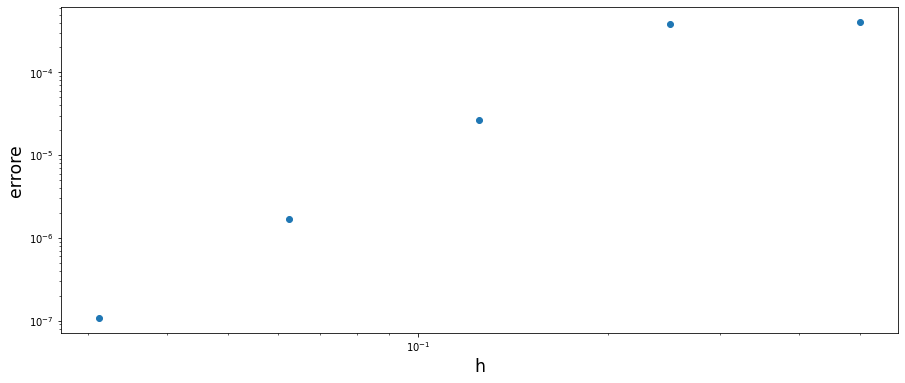

h=0.2500, k=0.1022
h=0.1250, k=3.8632
h=0.0625, k=3.9528
h=0.0312, k=3.9833


In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_xlabel('h', fontsize ='xx-large')
ax.set_ylabel('errore', fontsize ='xx-large')
ax.set_yscale('log')
ax.set_xscale('log')


plt.scatter(h_list, errore)
plt.show()

k_list = []
for i in range(1,len(errore)):
    k = np.log(errore[i-1]/errore[i])/np.log(h_list[i-1]/h_list[i])
    k_list.append(k)
    print(("h=%.4f, k=%.4f")%(h_list[i],k_list[i-1]))

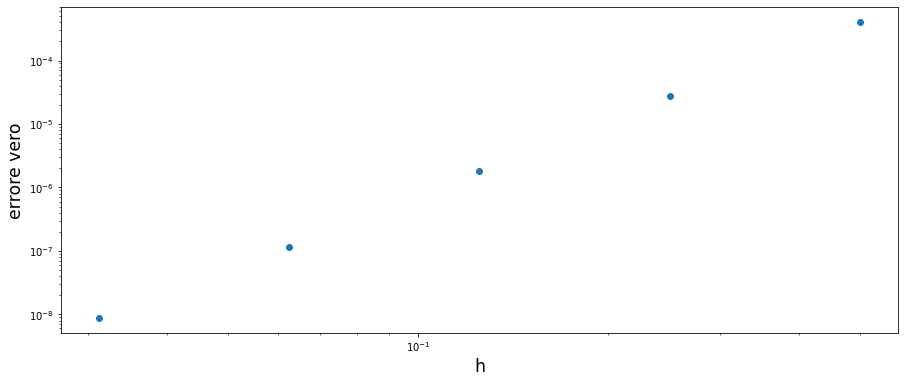

h=0.2500, k=3.8692
h=0.1250, k=3.9536
h=0.0625, k=3.9659
h=0.0312, k=3.7326


In [12]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.set_xlabel('h', fontsize ='xx-large')
ax.set_ylabel('errore vero', fontsize ='xx-large')
ax.set_yscale('log')
ax.set_xscale('log')


plt.scatter(h_list, err_vero)
#print(err_vero)
plt.show()

k_list_vero = []
for i in range(1,len(err_vero)):
    k = np.log(err_vero[i-1]/err_vero[i])/np.log(h_list[i-1]/h_list[i])
    k_list_vero.append(k)
    print(("h=%.4f, k=%.4f")%(h_list[i],k_list_vero[i-1]))

In [13]:
#2.c) 
a,b,lista_x4,lista_y4 = runge_kutta_4(x0,xf = 4,y0=y0,n=end_value, printing = True)

 y(0.06)= 0.93847704
 y(0.12)= 0.87891389
 y(0.19)= 0.82132780
 y(0.25)= 0.76574771
 y(0.31)= 0.71221453
 y(0.38)= 0.66078154
 y(0.44)= 0.61151493
 y(0.50)= 0.56449446
 y(0.56)= 0.51981424
 y(0.62)= 0.47758371
 y(0.69)= 0.43792874
 y(0.75)= 0.40099294
 y(0.81)= 0.36693919
 y(0.88)= 0.33595130
 y(0.94)= 0.30823605
 y(1.00)= 0.28402542
 y(1.06)= 0.26357912
 y(1.12)= 0.24718759
 y(1.19)= 0.23517522
 y(1.25)= 0.22790419
 y(1.31)= 0.22577869
 y(1.38)= 0.22924982
 y(1.44)= 0.23882108
 y(1.50)= 0.25505464
 y(1.56)= 0.27857852
 y(1.62)= 0.31009464
 y(1.69)= 0.35038814
 y(1.75)= 0.40033787
 y(1.81)= 0.46092849
 y(1.88)= 0.53326416
 y(1.94)= 0.61858433
 y(2.00)= 0.71828171
 y(2.06)= 0.83392296
 y(2.12)= 0.96727229
 y(2.19)= 1.12031877
 y(2.25)= 1.29530756
 y(2.31)= 1.49477597
 y(2.38)= 1.72159497
 y(2.44)= 1.97901723
 y(2.50)= 2.27073244
 y(2.56)= 2.60093152
 y(2.62)= 2.97438092
 y(2.69)= 3.39650882
 y(2.75)= 3.87350527
 y(2.81)= 4.41243871
 y(2.88)= 5.02139159
 y(2.94)= 5.70961863
 y(3.00)= 6.4

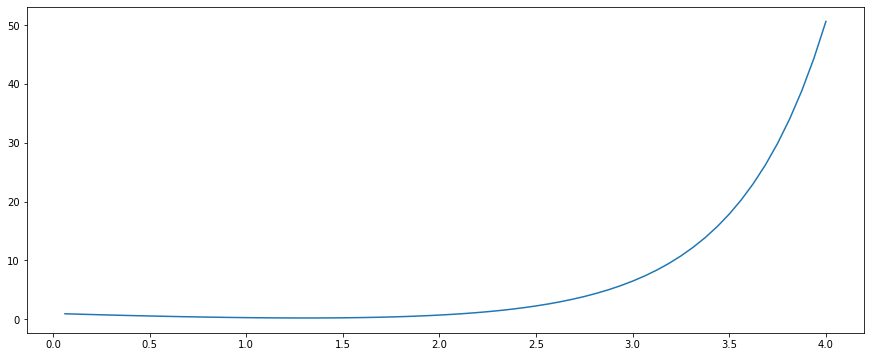

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(lista_x4,lista_y4)
plt.show()